# Real Time Demand Forecasting Model

In [1]:
#import models needed for machine learning algorhithms

import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# import/load the dataset
file = 'DataCoSupplyChainDataset.csv'
data = pd.read_csv(file, encoding='latin1')

# Display first few rows
data.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
#check for the datatypes
data_types = data.dtypes

#check for missing values
missing_values = data.isnull().sum()

#show results
print(data_types)
missing_values

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Data Processing

In [5]:
#Check missing values percentage over total number of rows in the dataframe
missing_values_percentage = (missing_values / data.shape[0]) * 1
#sort missing values percentage in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
#filter out 0 percentages
missing_values_percentage = missing_values_percentage[missing_values_percentage!= 0]
missing_values_percentage

Product Description    1.000000
Order Zipcode          0.862397
Customer Lname         0.000044
Customer Zipcode       0.000017
dtype: float64

In [6]:
# Drop the highest percentage of missing values in the dataset.
data_cleaned = data.drop(['Product Description', 'Order Zipcode'], axis=1)

# Impute missing values in undropped collumns with Unknown.
data_cleaned['Customer Lname'].fillna(value='Unknown',inplace=True)
data_cleaned['Customer Zipcode'].fillna(value='Unknown',inplace=True)

# Check the cleaned data results
data_cleaned.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [7]:
# Create a new dataframe for the transformed data
data_trans = data_cleaned.copy()

# Convert Date into datetime format
data_trans['order date (DateOrders)'] = pd.to_datetime(data_trans['order date (DateOrders)'])
data_trans['shipping date (DateOrders)'] = pd.to_datetime(data_trans['shipping date (DateOrders)'])

# Verify that the OrderID column is of type string
check_data_type = data_trans.dtypes
check_data_type

Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Email                           object
Customer Fname                           object
Customer Id                               int64
Customer Lname                           object
Customer Password                        object
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                         object
Department Id                           

### Feature Engineering

In [8]:
# Feature engineering: Extracting date features from the data'

# For order date
data_trans['order_year'] = data_trans['order date (DateOrders)'].dt.year
data_trans['order_month'] = data_trans['order date (DateOrders)'].dt.month
data_trans['order_day'] = data_trans['order date (DateOrders)'].dt.day
data_trans['order_dayofweek'] = data_trans['order date (DateOrders)'].dt.dayofweek
data_trans['order_hour'] = data_trans['order date (DateOrders)'].dt.hour

# Display the dataframe with the new features
data_trans[['order date (DateOrders)', 'order_year', 'order_month', 'order_day', 'order_dayofweek', 'order_hour']].head()


,order date (DateOrders),order_year,order_month,order_day,order_dayofweek,order_hour
0,2018-01-31 22:56:00,2018,1,31,2,22
1,2018-01-13 12:27:00,2018,1,13,5,12
2,2018-01-13 12:06:00,2018,1,13,5,12
3,2018-01-13 11:45:00,2018,1,13,5,11
4,2018-01-13 11:24:00,2018,1,13,5,11


In [9]:
# Identifying categorical columns
categorical_cols = data_trans.select_dtypes(include=['object']).columns.tolist()

# Exclude any unneeded columns
excluded_features = ['Customer Email', 'Customer Password', 'Product Image', 'Customer Lname', 'Customer Fname']

# Final list of categorical columns to be encoded
categorical_cols_to_encode = [col for col in categorical_cols if col not in excluded_features]

# Display the categorical columns that we will encode
categorical_cols_to_encode

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode']

In [10]:
# Checking the number of unique values in each categorical column
unique_values = {col: data_trans[col].nunique() 
                    for col in categorical_cols_to_encode}
unique_values_sorted = dict(sorted(unique_values.items(), key=lambda item: item[1]))

# Display the unique values in each categorical column 
unique_values_sorted

{'Customer Country': 2,
 'Customer Segment': 3,
 'Type': 4,
 'Delivery Status': 4,
 'Shipping Mode': 4,
 'Market': 5,
 'Order Status': 9,
 'Department Name': 11,
 'Order Region': 23,
 'Customer State': 46,
 'Category Name': 50,
 'Product Name': 118,
 'Order Country': 164,
 'Customer City': 563,
 'Customer Zipcode': 996,
 'Order State': 1089,
 'Order City': 3597,
 'Customer Street': 7458}

In [11]:
# Separating the target variable (y) from the features (X)
y = data_trans['Order Item Quantity']
X = data_trans.drop(columns=['Order Item Quantity', 'Customer Street', 'Order City'])

# List of columns to apply one-hot encoding and label encoding
low_cardinality_cols = [col for col, val in unique_values.items() if val <= 23 and col not in excluded_features]
high_cardinality_cols = [col for col, val in unique_values.items() if val > 23 and col not in excluded_features]

# Remove high cardinality columns from one-hot encoding list
high_cardinality_cols.remove('Customer Street')
high_cardinality_cols.remove('Order City')

# Adjusting the list of non-feature columns to exclude
non_feature_cols = ['Order Id', 'Product Card Id', 'Order Customer Id', 'Customer Id',
                    'order date (DateOrders)', 'shipping date (DateOrders)']  # Updated non-feature columns

# Remove the non-feature columns from the features dataframe
X = X.drop(columns=non_feature_cols, errors='ignore')  # Using errors='ignore' to avoid KeyError if the column is missing

# Display the columns selected for each type of encoding and the first row of features to confirm
(low_cardinality_cols, high_cardinality_cols), X.head(1)

((['Type',
   'Delivery Status',
   'Customer Country',
   'Customer Segment',
   'Department Name',
   'Market',
   'Order Region',
   'Order Status',
   'Shipping Mode'],
  ['Category Name',
   'Customer City',
   'Customer State',
   'Customer Zipcode',
   'Order Country',
   'Order State',
   'Product Name']),
     Type  Days for shipping (real)  Days for shipment (scheduled)  \
 0  DEBIT                         3                              4   
 
    Benefit per order  Sales per customer   Delivery Status  \
 0              91.25          314.640015  Advance shipping   
 
    Late_delivery_risk  Category Id   Category Name Customer City  ...  \
 0                   0           73  Sporting Goods        Caguas  ...   
 
                                   Product Image  Product Name Product Price  \
 0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
 
   Product Status   Shipping Mode order_year order_month order_day  \
 0              0  Standard Clas

In [12]:
# Applying one-hot encoding to low-cardinality columns
X_encoded = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

# Checking the shape after one-hot encoding
X_encoded.shape


(180519, 94)

In [13]:
# Identify high-cardinality columns that were not one-hot encoded and are still present in the dataframe
remaining_high_cardinality_cols = [col for col in high_cardinality_cols if col in X.columns]

# Apply label encoding to these columns
for col in remaining_high_cardinality_cols:
    label_encoder = LabelEncoder()
    # Ensure all data is string type
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col].astype(str))

# Check the first few rows to confirm the label encoding
X_encoded[remaining_high_cardinality_cols].head()


,Category Name,Customer City,Customer State,Customer Zipcode,Order Country,Order State,Product Name
0,40,66,36,525,70,475,78
1,40,66,36,525,69,841,78
2,40,452,5,936,69,841,78
3,40,285,5,713,8,835,78
4,40,66,36,525,8,835,78


### Splitting the data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display the size of the training and testing sets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((126363, 94), (126363,)), ((54156, 94), (54156,)))

In [15]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns.tolist()

non_numeric_columns

['Customer Email',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Product Image']

In [16]:
# Remove the non-numeric columns from the training and testing sets
X_train = X_train.drop(columns=non_numeric_columns, errors='ignore')
X_test = X_test.drop(columns=non_numeric_columns, errors='ignore')

X_train, X_test

(        Days for shipping (real)  Days for shipment (scheduled)  \
 99963                          6                              2   
 63538                          3                              4   
 6661                           2                              4   
 93913                          4                              4   
 90626                          3                              4   
 ...                          ...                            ...   
 119879                         6                              2   
 103694                         4                              4   
 131932                         2                              1   
 146867                         3                              2   
 121958                         5                              4   
 
         Benefit per order  Sales per customer  Late_delivery_risk  \
 99963         -190.570007          122.949997                   1   
 63538           -9.960000          199.25

### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the training set and the test set
train_predictions = rf_regressor.predict(X_train)
test_predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error for the training and testing sets
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

# Calculate the root mean squared error (RMSE) for the training and testing sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rmse_train, rmse_test


(0.0014795039326434185, 0.006668005257444111)

### Cross Validate

In [18]:
# Drop non numerical columns from previous encoded data
X_encoded_fold = X_encoded.drop(columns=non_numeric_columns, errors='ignore')

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer State,Customer Zipcode,...,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,73,40,66,36,525,...,True,False,False,False,False,False,False,False,False,True
1,5,4,-249.089996,311.359985,1,73,40,66,36,525,...,False,False,False,True,False,False,False,False,False,True
2,4,4,-247.779999,309.720001,0,73,40,452,5,936,...,False,False,False,False,False,False,False,False,False,True
3,3,4,22.860001,304.809998,0,73,40,285,5,713,...,True,False,False,False,False,False,False,False,False,True
4,2,4,134.210007,298.250000,0,73,40,66,36,525,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,18,59,31,42,...,False,False,False,False,False,False,False,False,False,True
180515,3,2,-613.770019,395.980011,1,45,18,26,5,876,...,True,False,False,False,False,False,False,False,True,False
180516,5,4,141.110001,391.980011,1,45,18,55,7,411,...,False,False,False,True,False,False,False,False,False,True
180517,3,4,186.229996,387.980011,0,45,18,66,36,525,...,False,False,False,False,True,False,False,False,False,True


In [19]:
#Cross Validation
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor with the same parameters as before
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation and calculate RMSE
neg_mse_scores = cross_val_score(rf_regressor, X_encoded_fold, y, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Calculate the average RMSE and the standard deviation of the RMSE
rmse_avg = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)

rmse_avg, rmse_std


(0.04580535242999067, 0.062308950909938876)

### Trying to avoid overfitting by reducing the complexity of the model

In [23]:
# Initialize Random Forest with parameters aimed at reducing complexity due to overfitting
rf_regressor_reduced = RandomForestRegressor(
    n_estimators=50,               # Fewer trees
    min_samples_split=10,          # More samples required to split a node
    min_samples_leaf=5,            # More samples required at a leaf node
    max_depth=10,                  # Shallower trees
    random_state=42
)

### Re process the model training with the adjusted complexity

In [24]:
# Re Run with reduced model complexity

# Fit the model to the training data
rf_regressor_reduced.fit(X_train, y_train)

# Predict on the training set and the test set
train_predictions = rf_regressor_reduced.predict(X_train)
test_predictions = rf_regressor_reduced.predict(X_test)

# Calculate the mean squared error for the training and testing sets
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

# Calculate the root mean squared error (RMSE) for the training and testing sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rmse_train, rmse_test

(0.0023456010430327324, 0.008230339413347958)

In [25]:
# Re Run with reduced model complexity

# Perform 5-fold cross-validation and calculate RMSE
neg_mse_scores = cross_val_score(rf_regressor_reduced, X_encoded_fold, y, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Calculate the average RMSE and the standard deviation of the RMSE
rmse_avg = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)

rmse_avg, rmse_std

(0.04571373295674923, 0.06358433830870865)

### Final parameters

In [26]:
# Changed the parameters again to adjust the generalization
rf_regressor_changed = RandomForestRegressor(
    n_estimators=75,               # Fewer trees
    min_samples_split=10,          # More samples required to split a node
    min_samples_leaf=5,            # More samples required at a leaf node
    max_depth=10,                  # Shallower trees
    random_state=42
)

### Final Test

In [27]:
# Re Run with reduced model complexity

# Fit the model to the training data
rf_regressor_changed.fit(X_train, y_train)

# Predict on the training set and the test set
train_predictions = rf_regressor_changed.predict(X_train)
test_predictions = rf_regressor_changed.predict(X_test)

# Calculate the mean squared error for the training and testing sets
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

# Calculate the root mean squared error (RMSE) for the training and testing sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rmse_train, rmse_test

(0.00221810831856315, 0.007532738230208968)

In [28]:
# Re Run with reduced model complexity

# Perform 5-fold cross-validation and calculate RMSE
neg_mse_scores = cross_val_score(rf_regressor_changed, X_encoded_fold, y, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Calculate the average RMSE and the standard deviation of the RMSE
rmse_avg = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)

rmse_avg, rmse_std

(0.045760183163604015, 0.06291734033630465)

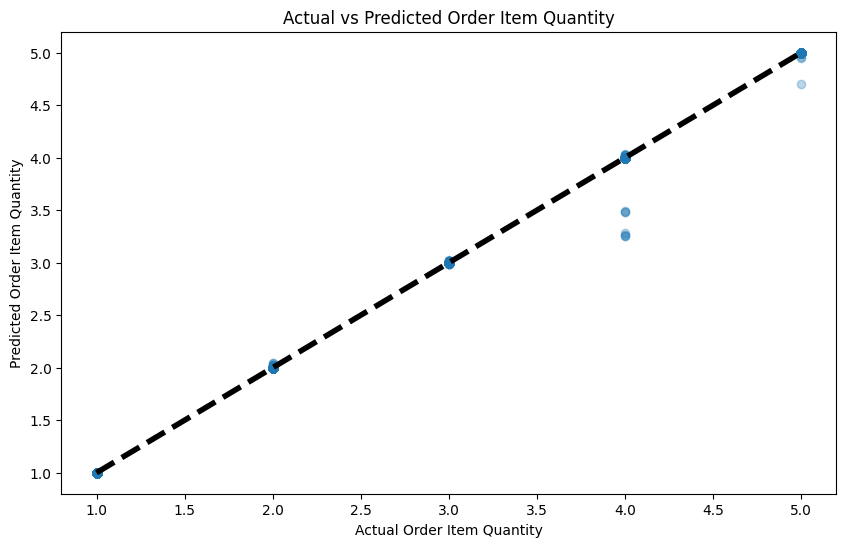

Final Test RMSE: 0.007532738230208968


In [30]:
import matplotlib.pyplot as plt

# Final Test
final_rf_regressor = rf_regressor_changed

# Predict on the test set
y_pred = final_rf_regressor.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Order Item Quantity')
plt.ylabel('Predicted Order Item Quantity')
plt.title('Actual vs Predicted Order Item Quantity')
plt.show()

# Calculate and print RMSE for the test set predictions
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Final Test RMSE: {rmse_test}')